# Yandex.Afisha Marketing Expense Optimization Analysis

##### This notebook contains server logs with data on Yandex.Afisha visits from June 2017 through May 2018, along with a dump file for the period and expense statistics.

##### We will use this data to study how people use the product, when they start to buy, how much money each customer brings, and when customers 'pay off' in terms of LTV.

##### Finally, at the end of the report we will use our data insights to help the marketing team understand where their budget is best spent.

In [42]:
# Let's begin by importing basic libraries that we'll need. We'll likely import more later in this notebook
import pandas as pd


In [43]:
visits = pd.read_csv('visits_log_us.csv', nrows=500)

In [44]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


In [45]:
visits['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

In [46]:
visits['Device'] = visits['Device'].astype('category')

In [47]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [48]:
# let's see how much memory we saved in memory usage
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Device     500 non-null    category
 1   End Ts     500 non-null    object  
 2   Source Id  500 non-null    int64   
 3   Start Ts   500 non-null    object  
 4   Uid        500 non-null    uint64  
dtypes: category(1), int64(1), object(2), uint64(1)
memory usage: 82.9 KB


In [49]:
# not a lot of memory was saved. Let's move on to other object columns
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y.%m.%d %H:%M")
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y.%m.%d %H:%M")

In [50]:
# let's see how much memory was saved
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    category      
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.5 KB


In [51]:
# Massive savings in memory! Last thing - let's make columns lowercase.
visits.columns = visits.columns.str.lower()
visits.head(5)

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [52]:
# moving on to the next dataset: orders
orders = pd.read_csv('orders_log_us.csv', nrows=500)
orders.info(memory_usage='deep')
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [53]:
# slightly smaller dataset, but still using object columns. Let's make Buy Ts dtype datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format="%Y.%m.%d %H:%M")
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   500 non-null    datetime64[ns]
 1   Revenue  500 non-null    float64       
 2   Uid      500 non-null    uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 11.8 KB


In [54]:
# let's make these columns lowercase as well
orders.columns = orders.columns.str.lower()
orders.head(3)

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [55]:
# nice! This dataset is workable now. Let's move on to the last one!
costs = pd.read_csv('costs_us.csv', nrows=500)
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


In [56]:
# another object column taking up too much space. Let's take a look at what dt entails
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [57]:
# dt is a datetime column. Let's make that column datetime format
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y.%m.%d")
costs.info(memory_usage='deep')
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  500 non-null    int64         
 1   dt         500 non-null    datetime64[ns]
 2   costs      500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.8 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [58]:
# awesome. We can work with this!

##### How many people use Yandex.Afisha every day, week and month?

In [65]:
# we'll dive into the visits dataframe for this.
# here's the calculation for users per day - we want to sum up the unique users for each time period
users_per_day = visits.groupby('end ts')['uid'].nunique().sum()

# here's the calculation for users per week
# we'll create a new column called week
visits['week'] = visits['end ts'].dt.isocalendar().week
users_per_week = visits.groupby('week')['uid'].nunique().sum()

# here's the calculation for users per month
visits['month'] = visits['end ts'].dt.month
users_per_month = visits.groupby('month')['uid'].nunique().sum()

print('Number of users per day (DAU):', users_per_day)
print('Number of users per week (WAU):', users_per_week)
print('Number of users per month (MAU):', users_per_month)


Number of users per day (DAU): 500
Number of users per week (WAU): 499
Number of users per month (MAU): 499


##### How many sessions are there per day?

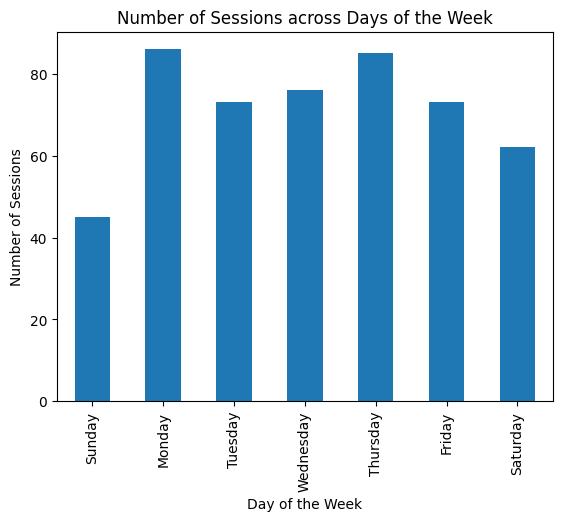

In [73]:
# Let's try to plot this across days of the week. We'll need another library
import matplotlib.pyplot as plt

visits['day_of_week'] = visits['end ts'].dt.day_name()

# create a new column
sessions_by_day = visits.groupby('day_of_week')['end ts'].size()

# order the days of the week
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot the sessions across days of the week
sessions_by_day.loc[ordered_days].plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sessions')
plt.title('Number of Sessions across Days of the Week')
plt.show()

# this result gives us insight as to which days are the busiest!


##### What is the length of each session?

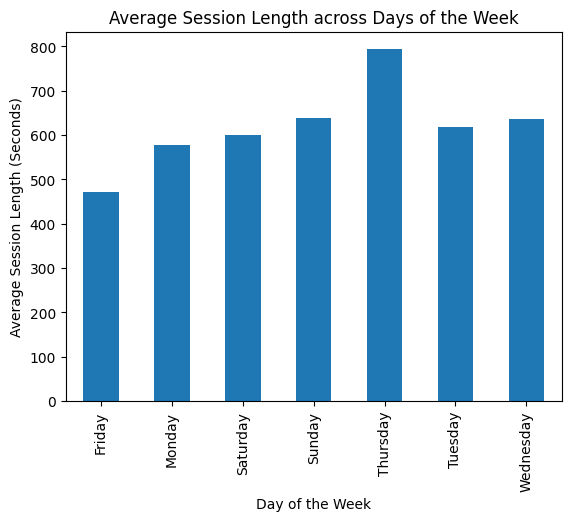

In [76]:
# let's subtract start ts from end ts and create a new column
visits['session_length'] = visits['end ts'] - visits['start ts']

# let's visualize this across days of the week

# Group by day of the week and calculate average session length
avg_session_length = visits.groupby('day_of_week')['session_length'].mean()

# Convert session length to total seconds
avg_session_length = avg_session_length.dt.total_seconds()

# Plotting the average session length across days of the week
avg_session_length.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Session Length (Seconds)')
plt.title('Average Session Length across Days of the Week')
plt.show()


##### What's the user retention rate?